In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier  
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [2]:
# Load the training data
train_data = pd.read_csv('train.csv')
train_data.head()

,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,PLID_4964,Keva Horan,23,M,Ukraine,6'2,176lbs,77.0,58.0,47.0,...,Right,7.7,NaN,8.1,2.0,High,Talent Hunt,8.0,0.0,1
1,PLID_11234,Herma Tann,18,M,Russia,5'10,148lbs,54.0,69.0,70.0,...,Any,5.3,0.0,NaN,3.0,Medium,Source,3.0,0.0,0
2,PLID_19127,Eilene Kizer,16,F,Spain,6'2,172lbs,34.0,43.0,45.0,...,Left,4.7,0.0,6.6,5.0,Low,Academy,2.0,0.0,1
3,PLID_17467,Andrea Badgett,27,M,Chile,5'11,165lbs,79.0,73.0,76.0,...,Right,8.6,113.0,8.6,6.0,Medium,Academy,13.0,16.0,1
4,PLID_9661,Jeremiah Bumbalough,19,F,Argentina,5'8,158lbs,47.0,61.0,74.0,...,Right,NaN,0.0,5.7,5.0,Medium,Academy,4.0,0.0,0


In [3]:
train_data.shape

(13994, 30)

In [4]:
# Display basic information about the dataset
print("Data Overview:")
print(train_data.info())

Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13994 entries, 0 to 13993
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player_id                  13994 non-null  object 
 1   name                       13994 non-null  object 
 2   age                        13994 non-null  int64  
 3   gender                     13975 non-null  object 
 4   country                    13994 non-null  object 
 5   height                     13994 non-null  object 
 6   weight                     13577 non-null  object 
 7   ball_controlling_skills    13581 non-null  float64
 8   body_reflexes              13994 non-null  float64
 9   body_balance               13994 non-null  float64
 10  jumping_skills             13970 non-null  float64
 11  penalties_conversion_rate  13964 non-null  float64
 12  mental_strength            13966 non-null  float64
 13  goalkeeping_skills         1399

In [5]:
# Display summary statistics for numeric columns
print("\nSummary Statistics:")
train_data.describe()


Summary Statistics:


,age,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,goalkeeping_skills,defending_skills,passing_skills,...,shot_accuracy,body_strength_stamina,max_running_speed,behaviour_rating,matches_played,fitness_rating,trophies_won,years_of_experience,no_of_disqualifications,selection
count,13994.000000,13581.000000,13994.000000,13994.000000,13970.000000,13964.000000,13966.000000,13994.000000,13994.000000,13994.000000,...,13422.000000,13994.000000,13994.000000,13291.000000,13328.000000,13299.000000,13994.000000,13850.000000,13994.000000,13994.000000
mean,21.135844,56.043958,61.934329,62.753323,63.612026,48.495703,56.768366,16.474632,48.108118,52.935973,...,47.178140,62.652780,23.586094,5.822068,3.908463,6.405482,3.389095,6.434152,-4.740675,0.557525
std,5.162719,16.787353,14.931963,14.203638,11.938712,15.767506,11.977744,16.874551,16.821929,14.201782,...,15.803991,11.512526,5.194387,1.095702,13.583229,1.706983,1.709152,4.450954,72.023656,0.496698
min,16.000000,5.000000,12.000000,9.000000,14.000000,7.000000,9.000000,1.000000,9.000000,13.000000,...,7.000000,15.000000,5.400000,2.100000,0.000000,1.000000,0.000000,1.000000,-999.000000,0.000000
25%,17.000000,51.000000,54.000000,55.000000,57.000000,39.000000,49.000000,10.000000,36.000000,45.000000,...,38.000000,56.000000,21.100000,5.100000,0.000000,5.600000,2.000000,2.000000,0.000000,0.000000
50%,20.000000,61.000000,64.000000,65.000000,64.000000,49.000000,58.000000,11.000000,52.000000,56.000000,...,50.000000,64.000000,24.600000,5.900000,0.000000,6.800000,3.000000,6.000000,0.000000,1.000000
75%,24.000000,67.000000,72.000000,73.000000,72.000000,60.000000,65.000000,12.000000,61.000000,63.000000,...,59.000000,71.000000,27.100000,6.500000,1.000000,7.500000,5.000000,10.000000,0.000000,1.000000
max,61.000000,95.000000,96.000000,97.000000,95.000000,92.000000,92.000000,88.000000,86.000000,89.000000,...,86.000000,92.000000,35.000000,9.800000,151.000000,10.000000,9.000000,26.000000,25.000000,1.000000


In [6]:
# data transformation

# Function to convert height from feet and inches to centimeters
def convert_height_to_cm(height):
    feet, inches = map(int, height.split("'"))
    total_inches = (feet * 12) + inches
    return total_inches * 2.54

# Function to remove "lbs" from weight and convert to integer
def remove_lbs(weight_str):
    if pd.notna(weight_str):
        return int(weight_str.replace("lbs", ""))
    else:
        return weight_str

# Apply centimeter conversion func
train_data['height'] = train_data['height'].apply(convert_height_to_cm)

# Apply the remove_lbs function to the 'weight' column
train_data['weight'] = train_data['weight'].apply(remove_lbs)

train_data.head()

,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,PLID_4964,Keva Horan,23,M,Ukraine,187.96,176.0,77.0,58.0,47.0,...,Right,7.7,NaN,8.1,2.0,High,Talent Hunt,8.0,0.0,1
1,PLID_11234,Herma Tann,18,M,Russia,177.80,148.0,54.0,69.0,70.0,...,Any,5.3,0.0,NaN,3.0,Medium,Source,3.0,0.0,0
2,PLID_19127,Eilene Kizer,16,F,Spain,187.96,172.0,34.0,43.0,45.0,...,Left,4.7,0.0,6.6,5.0,Low,Academy,2.0,0.0,1
3,PLID_17467,Andrea Badgett,27,M,Chile,180.34,165.0,79.0,73.0,76.0,...,Right,8.6,113.0,8.6,6.0,Medium,Academy,13.0,16.0,1
4,PLID_9661,Jeremiah Bumbalough,19,F,Argentina,172.72,158.0,47.0,61.0,74.0,...,Right,NaN,0.0,5.7,5.0,Medium,Academy,4.0,0.0,0


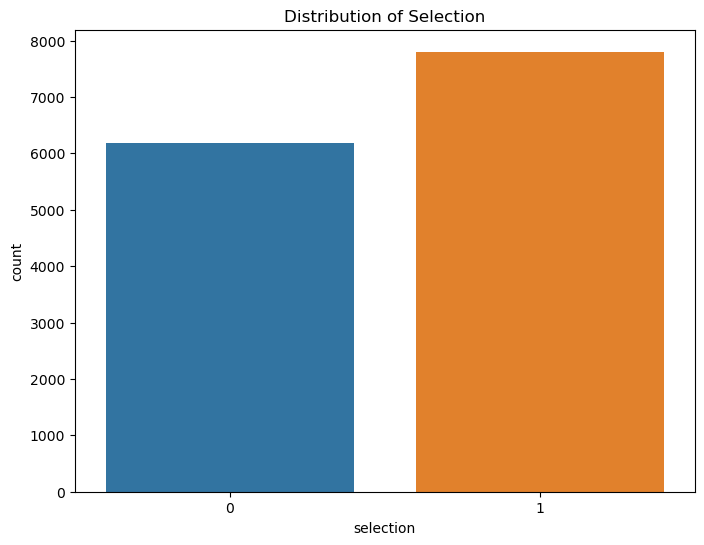

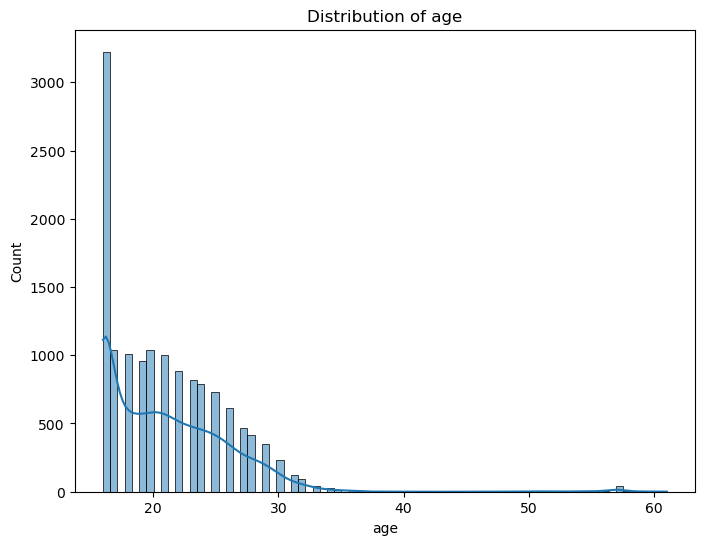

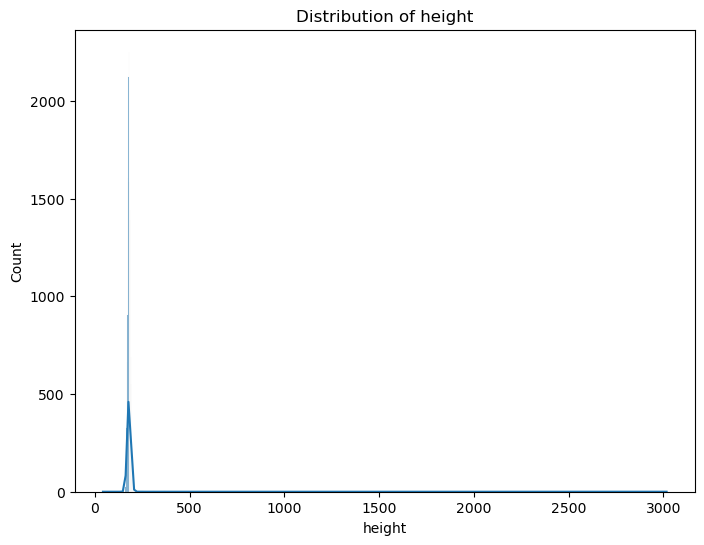

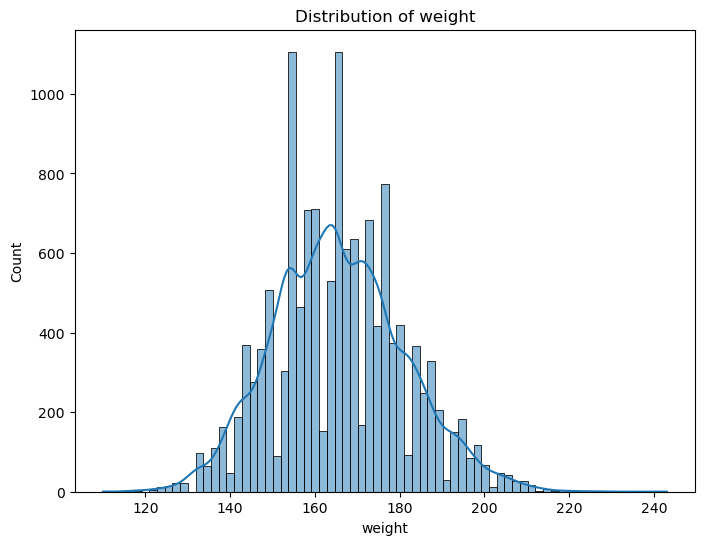

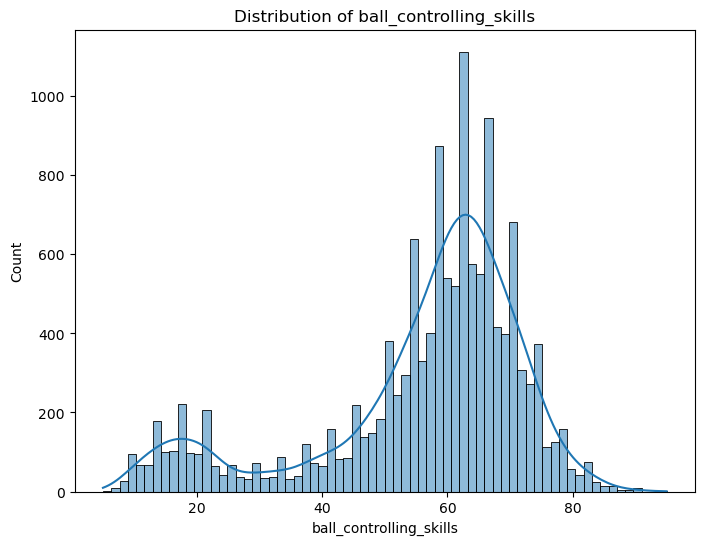

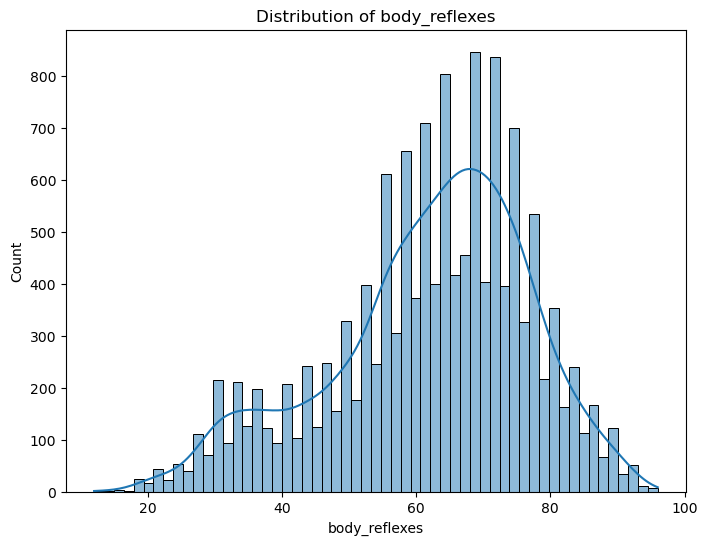

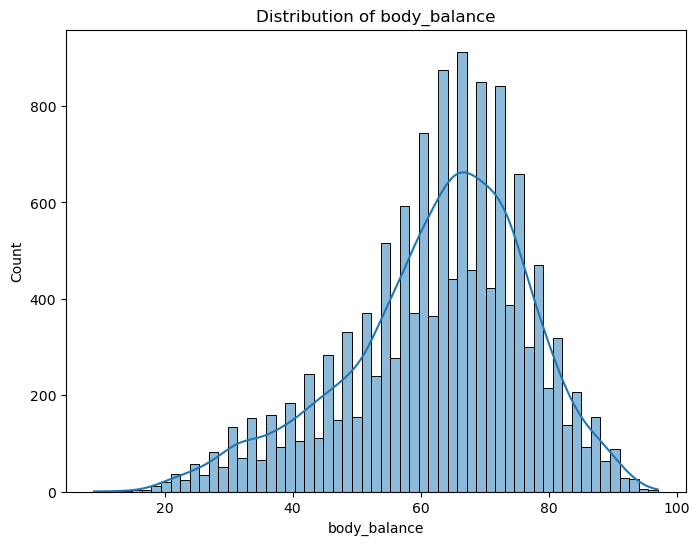

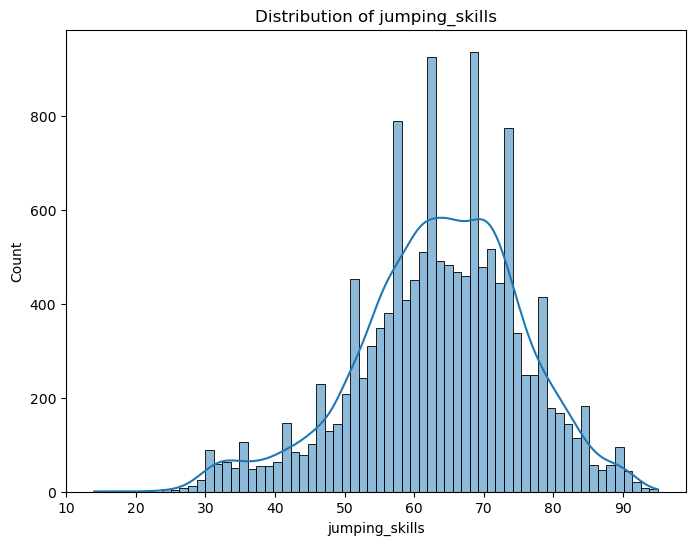

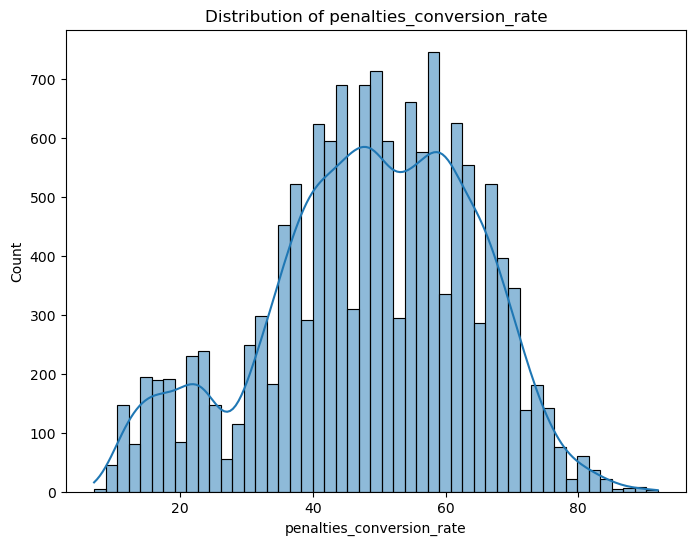

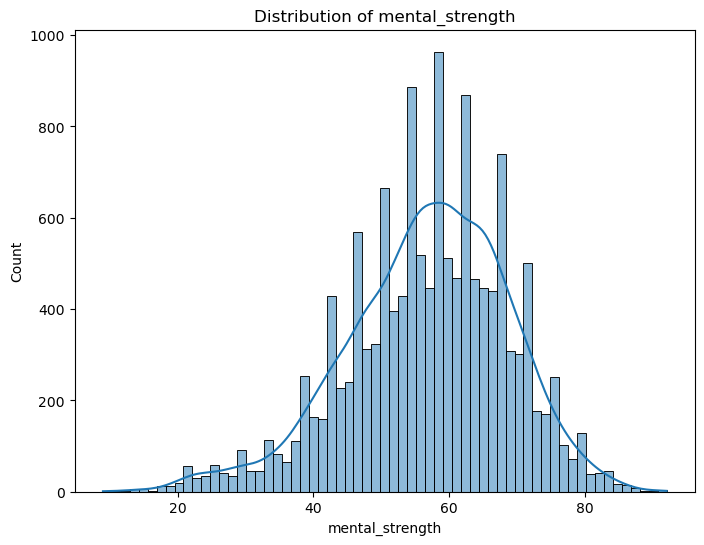

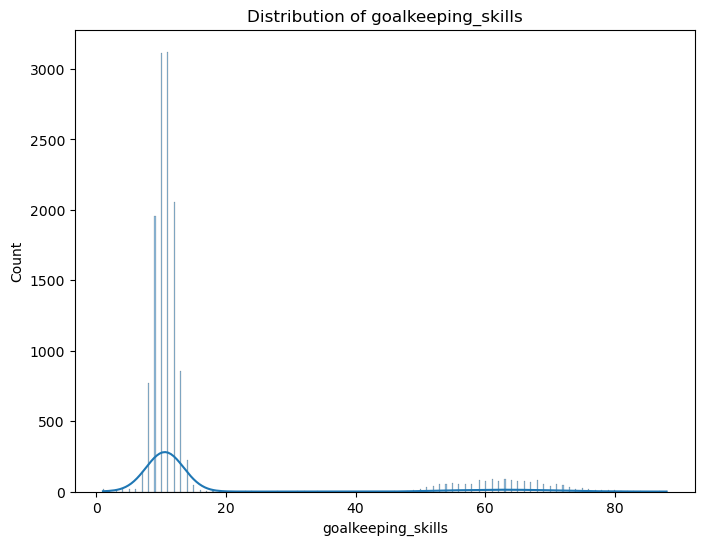

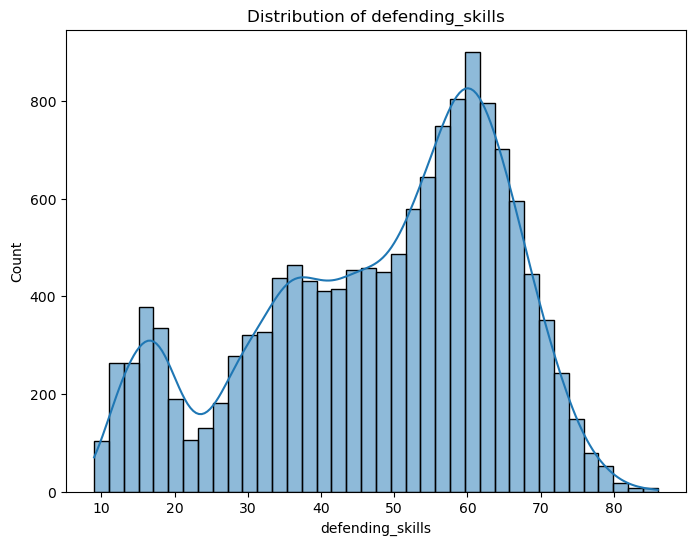

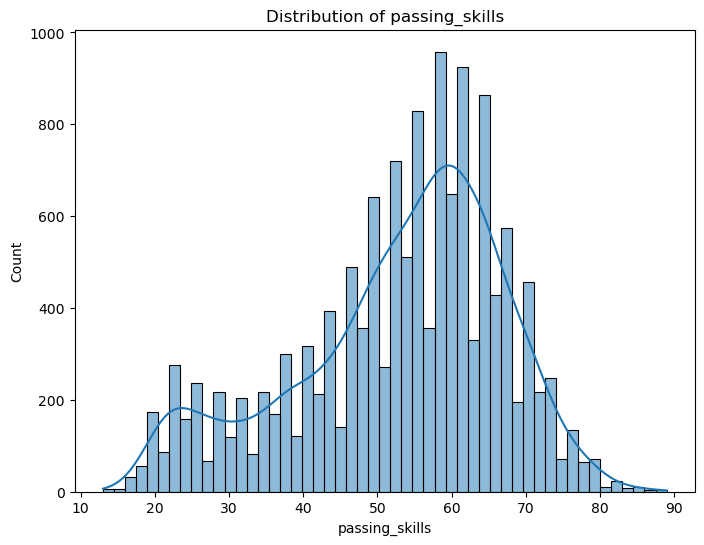

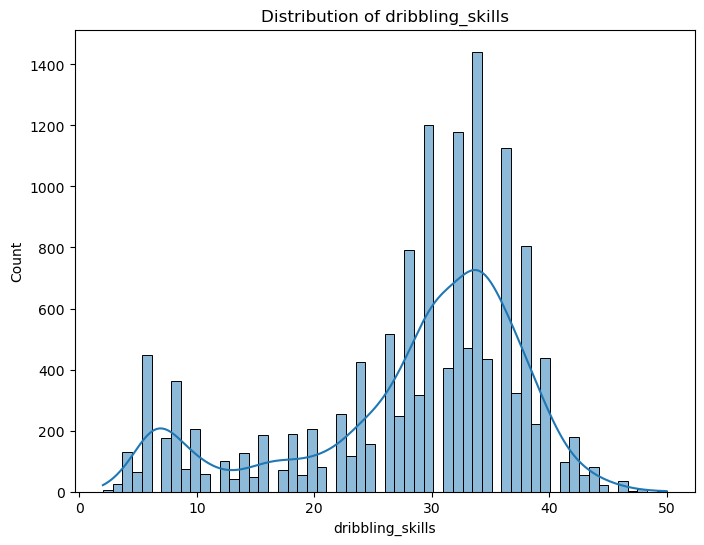

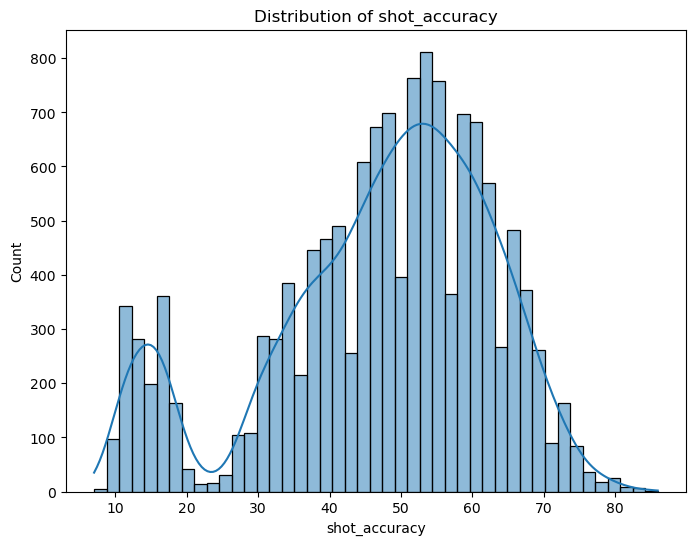

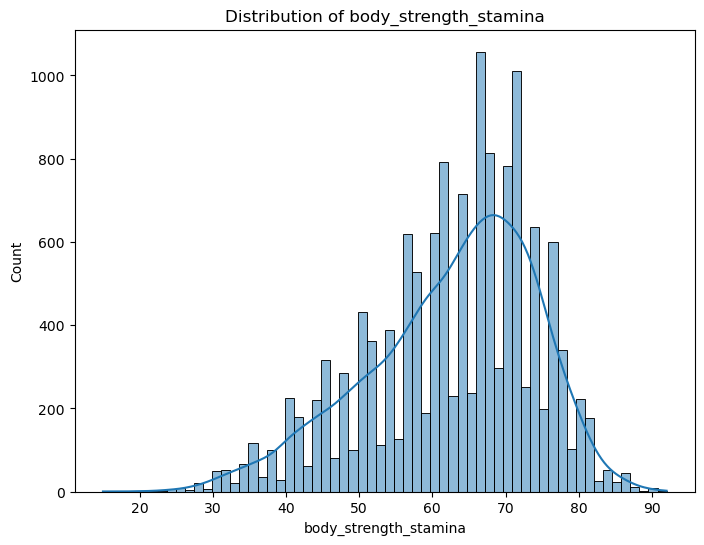

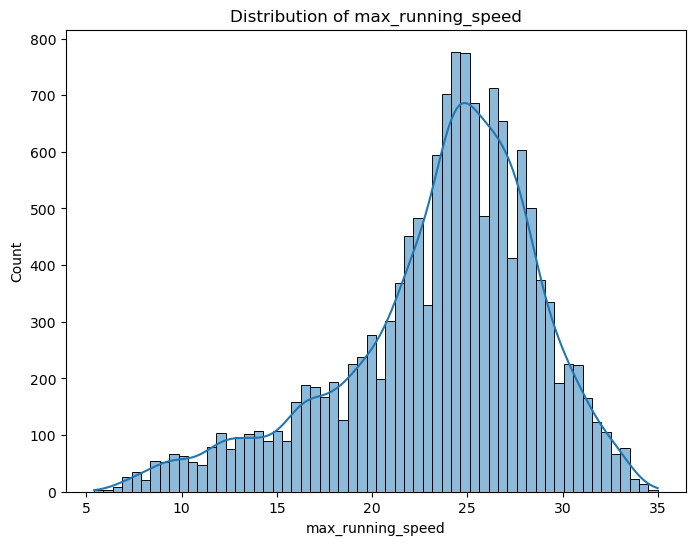

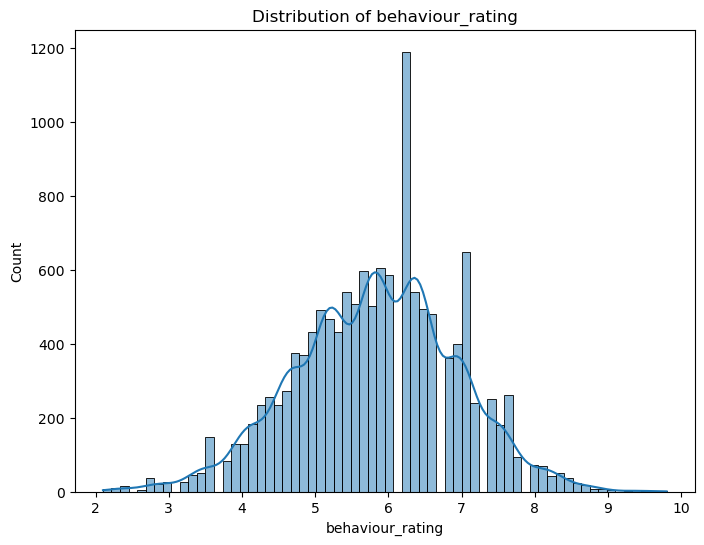

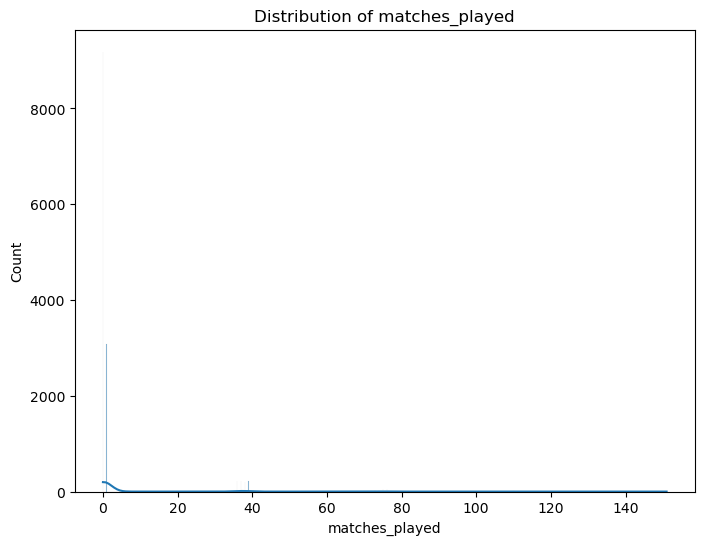

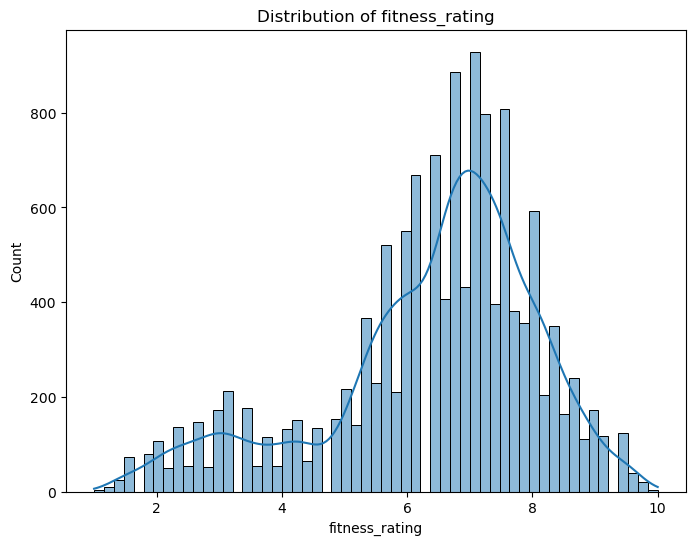

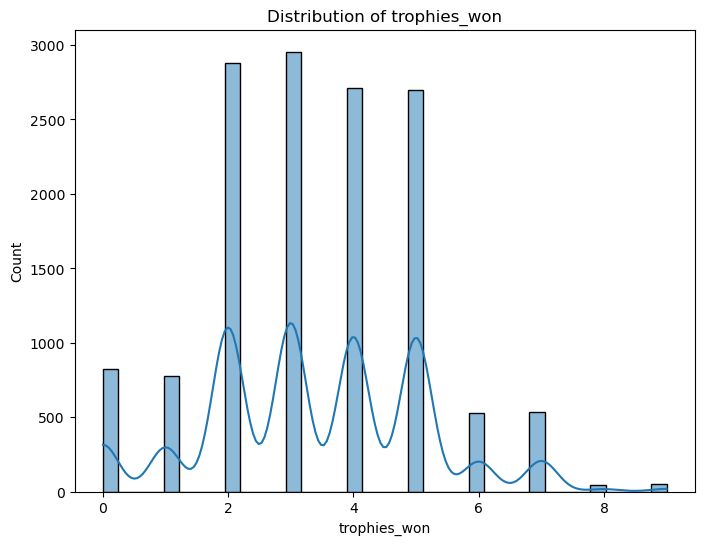

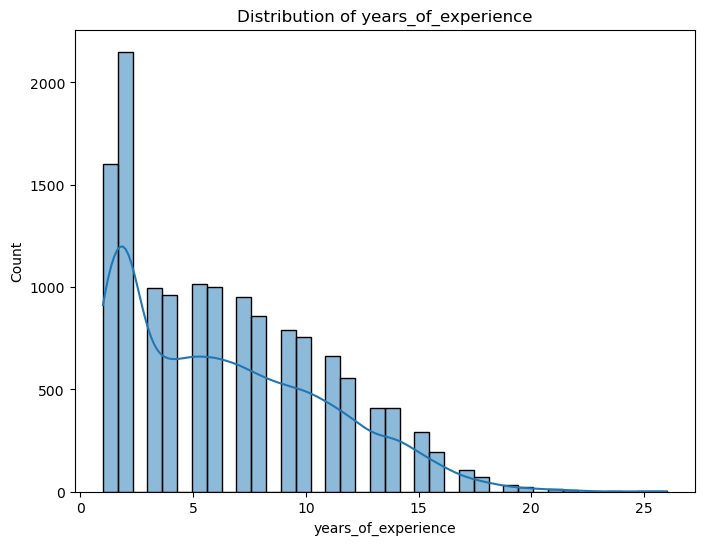

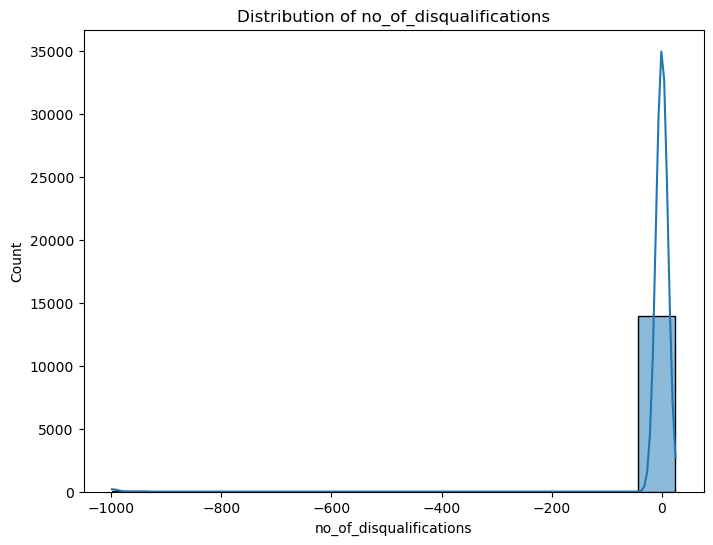

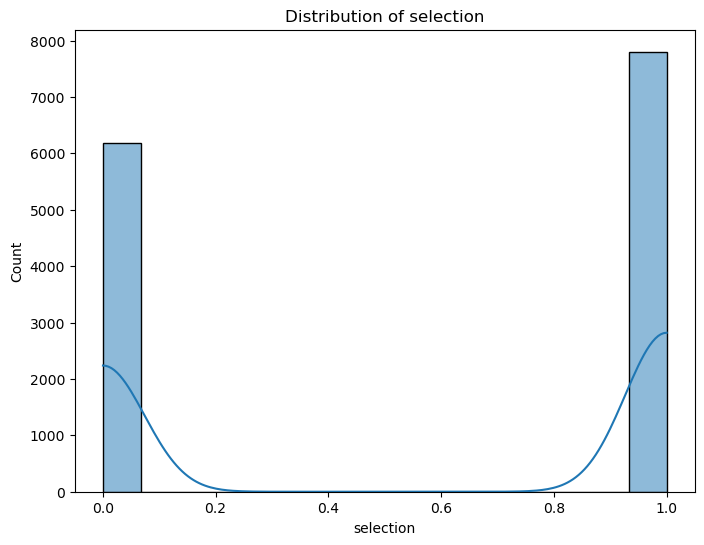

In [7]:
# Explore the distribution of the target variable 'selection'
plt.figure(figsize=(8, 6))
sns.countplot(data=train_data, x='selection')
plt.title("Distribution of Selection")
plt.show()

# Explore the distribution of numerical features
numeric_features = train_data.select_dtypes(include=['int64', 'float64']).columns
for feature in numeric_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(train_data[feature], kde=True)
    plt.title(f"Distribution of {feature}")
    plt.show()


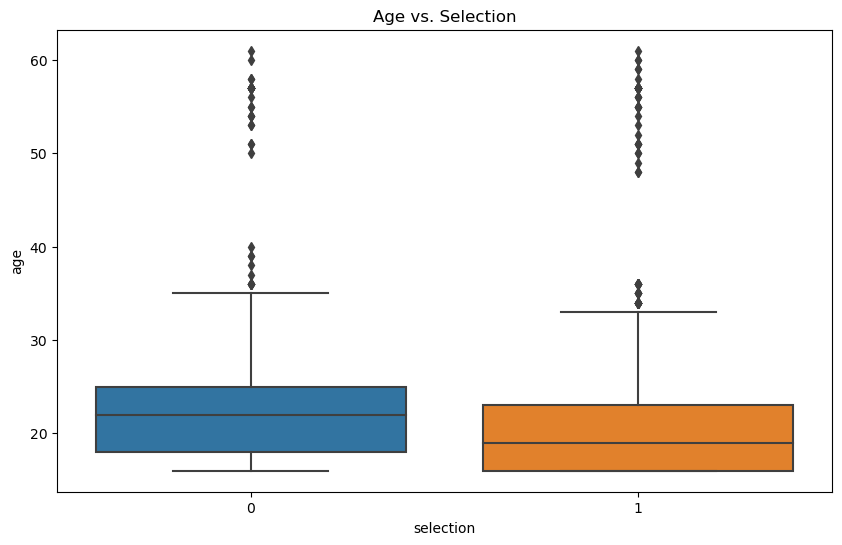

In [8]:
# Explore the relationship between features and the target variable
# For example, you can create scatter plots or box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_data, x='selection', y='age')
plt.title("Age vs. Selection")
plt.show()

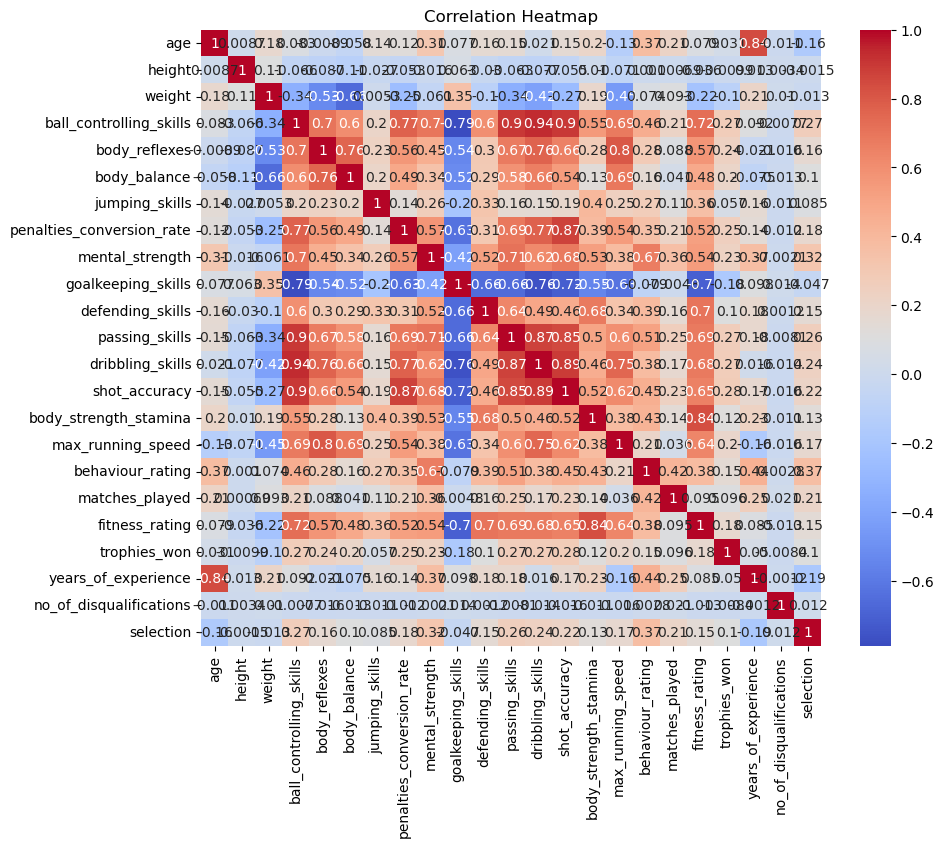

In [9]:
# Correlation heatmap for numerical features
correlation_matrix = train_data[numeric_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [10]:
# Check for missing values
missing_values = train_data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
player_id                      0
name                           0
age                            0
gender                        19
country                        0
height                         0
weight                       417
ball_controlling_skills      413
body_reflexes                  0
body_balance                   0
jumping_skills                24
penalties_conversion_rate     30
mental_strength               28
goalkeeping_skills             0
defending_skills               0
passing_skills                 0
dribbling_skills               0
shot_accuracy                572
body_strength_stamina          0
max_running_speed              0
strong_foot                  552
behaviour_rating             703
matches_played               666
fitness_rating               695
trophies_won                   0
dedication_level               0
coaching                     125
years_of_experience          144
no_of_disqualifications        0
selection                  

In [11]:
# Handle missing values (e.g., fill with mean, median, or drop columns)
# For example, filling missing numerical values with the mean
train_data.fillna(train_data.mean(), inplace=True)

C:\Users\pavit\AppData\Local\Temp\ipykernel_4036\864146612.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_data.fillna(train_data.mean(), inplace=True)


In [12]:
# Drop rows with null values in the 'gender' column
train_data.dropna(subset=['gender'], inplace=True)

# Impute 'strong_foot & coaching' with the mode value
strong_foot_mode = train_data['strong_foot'].mode()[0]
train_data['strong_foot'].fillna(strong_foot_mode, inplace=True)

mode_coaching = train_data['coaching'].mode()[0]
train_data['coaching'].fillna(mode_coaching, inplace=True)

In [13]:
train_data.isnull().sum()

player_id                    0
name                         0
age                          0
gender                       0
country                      0
height                       0
weight                       0
ball_controlling_skills      0
body_reflexes                0
body_balance                 0
jumping_skills               0
penalties_conversion_rate    0
mental_strength              0
goalkeeping_skills           0
defending_skills             0
passing_skills               0
dribbling_skills             0
shot_accuracy                0
body_strength_stamina        0
max_running_speed            0
strong_foot                  0
behaviour_rating             0
matches_played               0
fitness_rating               0
trophies_won                 0
dedication_level             0
coaching                     0
years_of_experience          0
no_of_disqualifications      0
selection                    0
dtype: int64

In [14]:
# Check for duplicates
duplicates = train_data.duplicated().sum()
print("Number of Duplicates:", duplicates)

Number of Duplicates: 0


In [15]:
train_data.dtypes

player_id                     object
name                          object
age                            int64
gender                        object
country                       object
height                       float64
weight                       float64
ball_controlling_skills      float64
body_reflexes                float64
body_balance                 float64
jumping_skills               float64
penalties_conversion_rate    float64
mental_strength              float64
goalkeeping_skills           float64
defending_skills             float64
passing_skills               float64
dribbling_skills             float64
shot_accuracy                float64
body_strength_stamina        float64
max_running_speed            float64
strong_foot                   object
behaviour_rating             float64
matches_played               float64
fitness_rating               float64
trophies_won                 float64
dedication_level              object
coaching                      object
y

In [16]:
# Filter columns with dtype 'object'
object_columns = train_data.select_dtypes(include=['object'])

# Get the number of unique values for each object column
unique_value_counts = object_columns.nunique()

unique_value_counts

player_id           13975
name                13975
gender                  2
country               163
strong_foot             4
dedication_level        3
coaching                4
dtype: int64

In [17]:
columns_to_encode = ['gender', 'strong_foot', 'dedication_level', 'coaching']

# Perform one-hot encoding for the specified columns
train_data = pd.get_dummies(train_data, columns=columns_to_encode)

In [18]:
train_data.head()

,player_id,name,age,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,...,strong_foot_Left,strong_foot_None,strong_foot_Right,dedication_level_High,dedication_level_Low,dedication_level_Medium,coaching_Academy,coaching_Source,coaching_Talent Hunt,coaching_Unknown
0,PLID_4964,Keva Horan,23,Ukraine,187.96,176.0,77.0,58.0,47.0,59.0,...,0,0,1,1,0,0,0,0,1,0
1,PLID_11234,Herma Tann,18,Russia,177.80,148.0,54.0,69.0,70.0,62.0,...,0,0,0,0,0,1,0,1,0,0
2,PLID_19127,Eilene Kizer,16,Spain,187.96,172.0,34.0,43.0,45.0,69.0,...,1,0,0,0,1,0,1,0,0,0
3,PLID_17467,Andrea Badgett,27,Chile,180.34,165.0,79.0,73.0,76.0,86.0,...,0,0,1,0,0,1,1,0,0,0
4,PLID_9661,Jeremiah Bumbalough,19,Argentina,172.72,158.0,47.0,61.0,74.0,57.0,...,0,0,1,0,0,1,1,0,0,0


In [19]:
# Normalize/Scale numerical features (optional but can be beneficial for some models)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_data[['age', 'height', 'weight']] = scaler.fit_transform(train_data[['age', 'height', 'weight']])

In [20]:
train_data.columns

Index(['player_id', 'name', 'age', 'country', 'height', 'weight',
       'ball_controlling_skills', 'body_reflexes', 'body_balance',
       'jumping_skills', 'penalties_conversion_rate', 'mental_strength',
       'goalkeeping_skills', 'defending_skills', 'passing_skills',
       'dribbling_skills', 'shot_accuracy', 'body_strength_stamina',
       'max_running_speed', 'behaviour_rating', 'matches_played',
       'fitness_rating', 'trophies_won', 'years_of_experience',
       'no_of_disqualifications', 'selection', 'gender_F', 'gender_M',
       'strong_foot_Any', 'strong_foot_Left', 'strong_foot_None',
       'strong_foot_Right', 'dedication_level_High', 'dedication_level_Low',
       'dedication_level_Medium', 'coaching_Academy', 'coaching_Source',
       'coaching_Talent Hunt', 'coaching_Unknown'],
      dtype='object')

In [21]:
X = train_data[['age', 'height', 'weight', 'ball_controlling_skills', 'body_reflexes',
               'body_balance', 'jumping_skills', 'penalties_conversion_rate', 'mental_strength',
               'goalkeeping_skills', 'defending_skills', 'passing_skills', 'dribbling_skills',
               'shot_accuracy', 'body_strength_stamina', 'max_running_speed',
               'behaviour_rating', 'matches_played', 'fitness_rating', 'trophies_won',
               'years_of_experience', 'no_of_disqualifications', 'gender_F', 'gender_M',
               'strong_foot_Any', 'strong_foot_Left', 'strong_foot_None', 'strong_foot_Right',
               'dedication_level_High', 'dedication_level_Low', 'dedication_level_Medium',
               'coaching_Academy', 'coaching_Source', 'coaching_Talent Hunt', 'coaching_Unknown']]

y = train_data['selection']


# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Choose a classification model (in this case, RandomForestClassifier)
model = RandomForestClassifier(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [23]:
# Make predictions on the validation set
y_pred = model.predict(X_valid)

# Evaluate the model using F1 score
f1 = f1_score(y_valid, y_pred)

print(f"F1 Score on Validation Set: {f1}")

F1 Score on Validation Set: 0.868732034493772


In [24]:
# Calculate various evaluation metrics
accuracy = accuracy_score(y_valid, y_pred)
precision = precision_score(y_valid, y_pred)
recall = recall_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_valid, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_valid, y_pred)
print("Classification Report:")
print(class_report)

Accuracy: 0.85
Precision: 0.86
Recall: 0.87
F1 Score: 0.87
Confusion Matrix:
[[1024  213]
 [ 198 1360]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.83      0.83      1237
           1       0.86      0.87      0.87      1558

    accuracy                           0.85      2795
   macro avg       0.85      0.85      0.85      2795
weighted avg       0.85      0.85      0.85      2795



In [25]:
# Import the GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Create a new model (GradientBoostingClassifier)
model2 = GradientBoostingClassifier(random_state=42)

# Train the model on the training data
model2.fit(X_train, y_train)

# Make predictions on the validation set
y_pred2 = model2.predict(X_valid)

# Evaluate the model using F1 score
f1_2 = f1_score(y_valid, y_pred2)

print(f"F1 Score on Validation Set (Gradient Boosting): {f1_2}")

F1 Score on Validation Set (Gradient Boosting): 0.865038560411311


In [26]:
# Import the Support Vector Machine classifier
from sklearn.svm import SVC

# Create a new model (Support Vector Machine classifier)
model3 = SVC(random_state=42)

# Train the model on the training data
model3.fit(X_train, y_train)

# Make predictions on the validation set
y_pred3 = model.predict(X_valid)

# Evaluate the model using F1 score
f1_3 = f1_score(y_valid, y_pred3)

print(f"F1 Score on Validation Set (SVM): {f1_3}")

F1 Score on Validation Set (SVM): 0.868732034493772


In [27]:
# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],    # Minimum samples required at each leaf node
}

# Create the GridSearchCV object with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X, y)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Now you can use the best model for making predictions or further evaluation

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [41]:
# Create and fit the RandomForestClassifier with best hyperparameter
best_model = RandomForestClassifier(n_estimators=300, max_depth=None, min_samples_leaf=1, min_samples_split=2, random_state=42)  
best_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, random_state=42)

In [42]:
# Make predictions on the validation set after tuning the model
y_pred_tune = best_model.predict(X_valid)

# Evaluate the model using F1 score after tuning the model
f1_tune = f1_score(y_valid, y_pred_tune)

print(f"F1 Score on Validation Set: {f1_tune}")

F1 Score on Validation Set: 0.8753180661577609


Predictions on Test Data

In [67]:
test_data = pd.read_csv("test.csv")
test_data

,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,...,max_running_speed,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications
0,PLID_14644,Ha Matta,16,F,Austria,6'1,163lbs,68.0,68.0,54.0,...,25.6,Right,6.5,0.0,7.7,3.0,Medium,Unknown,1.0,0.0
1,PLID_5934,Rex Weinstock,23,F,South Africa,5'9,170lbs,65.0,73.0,78.0,...,27.6,Right,5.1,1.0,6.1,3.0,Medium,Academy,9.0,0.0
2,PLID_5074,Raisa Angeles,18,F,Netherlands,5'10,154lbs,72.0,79.0,64.0,...,29.4,Left,5.8,0.0,8.4,2.0,Medium,Academy,3.0,0.0
3,PLID_17357,Jong Flewelling,24,F,China PR,6'0,168lbs,64.0,76.0,65.0,...,23.0,Right,5.2,0.0,6.2,6.0,High,Academy,10.0,0.0
4,PLID_13993,Dian Westmoreland,20,F,Australia,6'0,163lbs,53.0,58.0,57.0,...,23.2,Right,4.7,0.0,6.9,3.0,Medium,Talent Hunt,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9325,PLID_7718,Dorine Brehmer,27,F,England,6'3,172lbs,48.0,47.0,39.0,...,20.2,Right,NaN,0.0,7.0,2.0,High,Talent Hunt,NaN,0.0
9326,PLID_1563,Teri Puente,16,M,Belgium,6'3,169lbs,31.0,38.0,47.0,...,20.4,Right,4.7,NaN,5.8,5.0,Medium,Academy,2.0,0.0
9327,PLID_6017,Gertrud Aleshire,17,M,South Africa,5'10,154lbs,60.0,58.0,68.0,...,26.9,Any,5.1,0.0,6.2,5.0,Medium,Academy,3.0,0.0
9328,PLID_9370,Chantel Corum,16,M,Italy,6'0,165lbs,17.0,32.0,36.0,...,9.2,NaN,5.0,0.0,1.6,2.0,Medium,Academy,2.0,0.0


In [56]:
# data transformation

# Function to convert height from feet and inches to centimeters
def convert_height_to_cm(height):
    feet, inches = map(int, height.split("'"))
    total_inches = (feet * 12) + inches
    return total_inches * 2.54

# Function to remove "lbs" from weight and convert to integer
def remove_lbs(weight_str):
    if pd.notna(weight_str):
        return int(weight_str.replace("lbs", ""))
    else:
        return weight_str

# Apply centimeter conversion func
test_data['height'] = test_data['height'].apply(convert_height_to_cm)

# Apply the remove_lbs function to the 'weight' column
test_data['weight'] = test_data['weight'].apply(remove_lbs)

test_data.head()

,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,...,max_running_speed,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications
0,PLID_14644,Ha Matta,16,F,Austria,185.42,163.0,68.0,68.0,54.0,...,25.6,Right,6.5,0.0,7.7,3.0,Medium,Unknown,1.0,0.0
1,PLID_5934,Rex Weinstock,23,F,South Africa,175.26,170.0,65.0,73.0,78.0,...,27.6,Right,5.1,1.0,6.1,3.0,Medium,Academy,9.0,0.0
2,PLID_5074,Raisa Angeles,18,F,Netherlands,177.80,154.0,72.0,79.0,64.0,...,29.4,Left,5.8,0.0,8.4,2.0,Medium,Academy,3.0,0.0
3,PLID_17357,Jong Flewelling,24,F,China PR,182.88,168.0,64.0,76.0,65.0,...,23.0,Right,5.2,0.0,6.2,6.0,High,Academy,10.0,0.0
4,PLID_13993,Dian Westmoreland,20,F,Australia,182.88,163.0,53.0,58.0,57.0,...,23.2,Right,4.7,0.0,6.9,3.0,Medium,Talent Hunt,5.0,0.0


In [57]:
test_data.fillna(test_data.mean(), inplace=True)

test_data.dropna(subset=['gender'], inplace=True)

strong_foot_mode = test_data['strong_foot'].mode()[0]
test_data['strong_foot'].fillna(strong_foot_mode, inplace=True)

mode_coaching = test_data['coaching'].mode()[0]
test_data['coaching'].fillna(mode_coaching, inplace=True)

C:\Users\pavit\AppData\Local\Temp\ipykernel_4036\1753892505.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test_data.fillna(test_data.mean(), inplace=True)


In [58]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
test_data[['age', 'height', 'weight']] = scaler.fit_transform(test_data[['age', 'height', 'weight']])

In [59]:
columns_to_encode = ['gender', 'strong_foot', 'dedication_level', 'coaching']

# Perform one-hot encoding for the specified columns
test_data = pd.get_dummies(test_data, columns=columns_to_encode)

In [60]:
test_data.head()

,player_id,name,age,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,...,strong_foot_Left,strong_foot_None,strong_foot_Right,dedication_level_High,dedication_level_Low,dedication_level_Medium,coaching_Academy,coaching_Source,coaching_Talent Hunt,coaching_Unknown
0,PLID_14644,Ha Matta,0.000000,Austria,0.047822,0.420635,68.0,68.0,54.0,67.0,...,0,0,1,0,0,1,0,0,0,1
1,PLID_5934,Rex Weinstock,0.159091,South Africa,0.044406,0.476190,65.0,73.0,78.0,92.0,...,0,0,1,0,0,1,1,0,0,0
2,PLID_5074,Raisa Angeles,0.045455,Netherlands,0.045260,0.349206,72.0,79.0,64.0,37.0,...,1,0,0,0,0,1,1,0,0,0
3,PLID_17357,Jong Flewelling,0.181818,China PR,0.046968,0.460317,64.0,76.0,65.0,65.0,...,0,0,1,1,0,0,1,0,0,0
4,PLID_13993,Dian Westmoreland,0.090909,Australia,0.046968,0.420635,53.0,58.0,57.0,66.0,...,0,0,1,0,0,1,0,0,1,0


In [63]:
test_x = test_data.drop(['country', 'name', 'player_id'], axis=1)
test_x.head()

,age,height,weight,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,goalkeeping_skills,...,strong_foot_Left,strong_foot_None,strong_foot_Right,dedication_level_High,dedication_level_Low,dedication_level_Medium,coaching_Academy,coaching_Source,coaching_Talent Hunt,coaching_Unknown
0,0.000000,0.047822,0.420635,68.0,68.0,54.0,67.0,42.0,55.0,10.0,...,0,0,1,0,0,1,0,0,0,1
1,0.159091,0.044406,0.476190,65.0,73.0,78.0,92.0,49.0,50.0,9.0,...,0,0,1,0,0,1,1,0,0,0
2,0.045455,0.045260,0.349206,72.0,79.0,64.0,37.0,64.0,64.0,12.0,...,1,0,0,0,0,1,1,0,0,0
3,0.181818,0.046968,0.460317,64.0,76.0,65.0,65.0,39.0,38.0,10.0,...,0,0,1,1,0,0,1,0,0,0
4,0.090909,0.046968,0.420635,53.0,58.0,57.0,66.0,36.0,59.0,11.0,...,0,0,1,0,0,1,0,0,1,0


In [64]:
# Make predictions on the test data
y_test_pred = best_model.predict(test_x)

In [65]:
# Create a submission DataFrame with "player_id" and the model's predictions
submission_df = pd.DataFrame({'player_id': test_data['player_id'], 'selection': y_test_pred}).head(4665)

# Save the submission DataFrame to a CSV file
submission_df.to_csv("submission.csv", index=False)

In [66]:
submission_df

,player_id,selection
0,PLID_14644,1
1,PLID_5934,0
2,PLID_5074,1
3,PLID_17357,0
4,PLID_13993,0
...,...,...
9325,PLID_7718,0
9326,PLID_1563,0
9327,PLID_6017,1
9328,PLID_9370,0
